<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorio N°06

## Objetivos de la clase

* Reforzar los conceptos básicos del E.D.A..

## Contenidos

* [Problema 01](#p1)


## Problema 01
<img src="./images/logo_iris.jpg" width="360" height="360" align="center"/>

El **Iris dataset** es un conjunto de datos que contine una  muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [53]:
# librerias
 
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes


# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [54]:
# cargar datos
df = pd.read_csv(os.path.join("data","iris_contaminados.csv"))
df.columns = ['sepalLength',
                  'sepalWidth',
                  'petalLength',
                  'petalWidth',
                  'species']

df.head() 

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,VIRGINICA
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica


### Bases del experimento

Lo primero es identificar las variables que influyen en el estudio y la naturaleza de esta.

* **species**: 
    * Descripción: Nombre de la especie de Iris. 
    * Tipo de dato: *string*
    * Limitantes: solo existen tres tipos (setosa, virginia y versicolor).
* **sepalLength**: 
    * Descripción: largo del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 4.0 y 7.0 cm.
* **sepalWidth**: 
    * Descripción: ancho del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 2.0 y 4.5 cm.
* **petalLength**: 
    * Descripción: largo del pétalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 1.0 y 7.0 cm.
* **petalWidth**: 
    * Descripción: ancho del pépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 0.1 y 2.5 cm.

Su objetivo es realizar un correcto **E.D.A.**, para esto debe seguir las siguientes intrucciones:

1. Realizar un conteo de elementos de la columna **species** y corregir según su criterio. Reemplace por "default" los valores nan..

In [56]:
#nombres de columnas contaminadas
df['species'].unique()

array(['setosa', ' virginica', 'VIRGINICA', 'virginica', 'virginica ',
       'versicolor', 'Versicolor', 'VERSICOLOR', nan, 'Setosa', 'SETOSA'],
      dtype=object)

In [57]:
# nombres de columnas corregidos
df['species'] = df['species'].str.lower().str.strip()
df.loc[df['species'].isnull(),'species']='default'
df['species'].unique()

array(['setosa', 'virginica', 'versicolor', 'default'], dtype=object)

2. Realizar un gráfico de box-plot sobre el largo y ancho de los petalos y sépalos. Reemplace por **0** los valores nan.

In [58]:
# remplazar nan por 0
df.loc[df['sepalLength'].isnull(),'sepalLength']=0
df.loc[df['sepalWidth'].isnull(),'sepalWidth']=0
df.loc[df['petalLength'].isnull(),'petalLength']=0
df.loc[df['petalWidth'].isnull(),'petalWidth']=0

<AxesSubplot:>

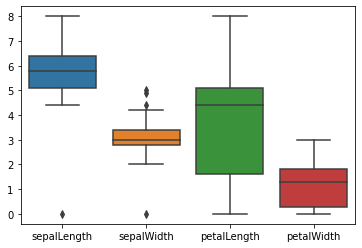

In [59]:
# grafico box-plot largo y ancho petalos y sepalos
petal_sepal_df = df.drop(['species'], axis=1)
sns.boxplot(data=petal_sepal_df)

3. Anteriormente se define un rango de valores válidos para los valores del largo y ancho de los petalos y sépalos. Agregue una columna denominada **label**  que identifique cuál de estos valores esta fuera del rango de valores válidos.

In [62]:
#lista de labels
limites = pd.DataFrame({'sepalLength': [7.0, 4.0], 'sepalWidth': [4.5, 2.0], 'petalLength': [7.0, 1.0], 'petalWidth': [2.5, 0.1]})
lista=[]
columnas = petal_sepal_df.columns
for i in range(0,len(df)):
    validation = True
    for columna in columnas:
        if df.loc[i][columna] <= limites.loc[0][columna] and df.loc[i][columna] >= limites.loc[1][columna]:
            validation = validation and True
        else:
            validation= False
    lista.append(validation)
    

In [65]:
# agregar la columna "label" a el dataframe
columna_label=pd.DataFrame(lista, columns=['label'])
df = pd.concat([df,columna_label], axis=1, sort=False)
df

,sepalLength,sepalWidth,petalLength,petalWidth,species,label
0,4.4,3.2,1.3,3.0,setosa,False
1,7.2,3.6,6.1,2.5,virginica,False
2,6.3,3.3,6.0,2.5,virginica,True
3,6.7,3.3,5.7,2.5,virginica,True
4,6.3,3.4,5.6,2.4,virginica,True
...,...,...,...,...,...,...
145,5.3,3.0,1.1,0.1,setosa,True
146,4.8,3.0,1.4,0.1,setosa,True
147,4.9,3.1,1.5,0.1,setosa,True
148,4.9,3.6,1.4,0.1,setosa,True


4. Realice un gráfico de *sepalLength* vs *petalLength* y otro de *sepalWidth* vs *petalWidth* categorizados por la etiqueta **label Concluya sus resultados.

<AxesSubplot:xlabel='sepalLength', ylabel='petalLength'>

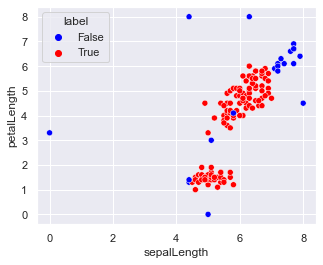

In [68]:
#sepalLength vs petalLength
sns.set(rc={'figure.figsize':(5,4)})

sns.scatterplot(
        x='sepalLength',
        y='petalLength',
        data=df,
        hue='label',
        palette = ['blue', 'red']
    
)

<AxesSubplot:xlabel='sepalWidth', ylabel='petalWidth'>

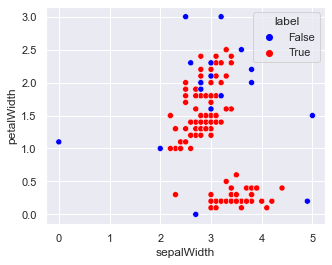

In [69]:
#sepalWidth vs petalWidth
sns.set(rc={'figure.figsize':(5,4)})

sns.scatterplot(
        x='sepalWidth',
        y='petalWidth',
        data=df,
        hue='label',
        palette = ['blue', 'red']
    
)

5. Filtre los datos válidos y realice un gráfico de *sepalLength* vs *petalLength* categorizados por la etiqueta **species**.

In [75]:
#filtracion de datos
mask = df['label']==True
df_filtrado = df[mask]
df_filtrado

,sepalLength,sepalWidth,petalLength,petalWidth,species,label
2,6.3,3.3,6.0,2.5,virginica,True
3,6.7,3.3,5.7,2.5,virginica,True
4,6.3,3.4,5.6,2.4,virginica,True
5,6.7,3.1,5.6,2.4,virginica,True
6,5.8,2.8,5.1,2.4,virginica,True
...,...,...,...,...,...,...
145,5.3,3.0,1.1,0.1,setosa,True
146,4.8,3.0,1.4,0.1,setosa,True
147,4.9,3.1,1.5,0.1,setosa,True
148,4.9,3.6,1.4,0.1,setosa,True


<AxesSubplot:xlabel='sepalLength', ylabel='petalLength'>

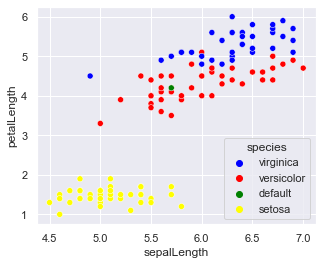

In [76]:
#sepalLength vs petalLength
sns.set(rc={'figure.figsize':(5,4)})

sns.scatterplot(
        x='sepalLength',
        y='petalLength',
        data=df_filtrado,
        hue='species',
        palette = ['blue', 'red', 'green', 'yellow']
    
)